<a href="https://colab.research.google.com/github/emenezes-portfolio/06-churn/blob/main/churn_analise_estatistica_avancada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Churn com Estatística Avançada

Este notebook demonstra uma análise detalhada de churn de clientes utilizando técnicas avançadas de estatística, incluindo regressão logística, análise discriminante, e árvores de decisão. Cada etapa será explicada detalhadamente com comentários e interpretações.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
# Carregando um dataset de exemplo
df = sns.load_dataset('titanic').dropna(subset=['age', 'sex', 'fare', 'embarked'])
df = df[['sex', 'age', 'fare', 'embarked', 'survived']]
df.columns = ['Sexo', 'Idade', 'Tarifa', 'Embarque', 'Churn']  # 'Survived' será nossa variável de churn (simulação)
df['Churn'] = 1 - df['Churn']  # Inverter: 1 = Churn, 0 = Retido

# Convertendo variáveis categóricas
df = pd.get_dummies(df, drop_first=True)
df.head()


,Idade,Tarifa,Churn,Sexo_male,Embarque_Q,Embarque_S
0,22.0,7.2500,1,True,False,True
1,38.0,71.2833,0,False,False,False
2,26.0,7.9250,0,False,False,True
3,35.0,53.1000,0,False,False,True
4,35.0,8.0500,1,True,False,True


<Axes: >

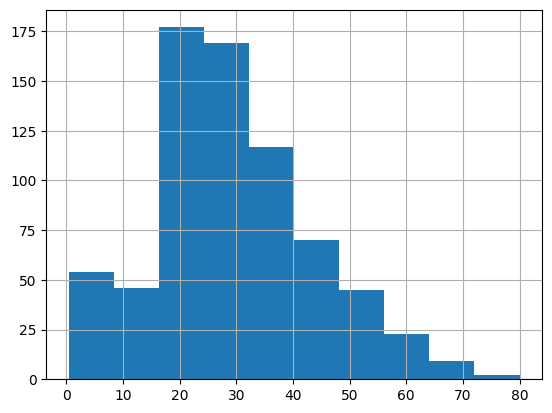

In [10]:
# prompt: Usando o DataFrame df: idade

df['Idade'].hist()

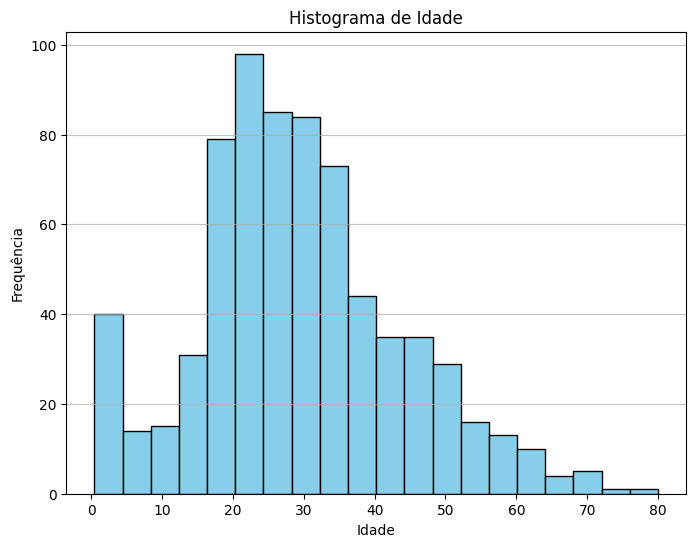

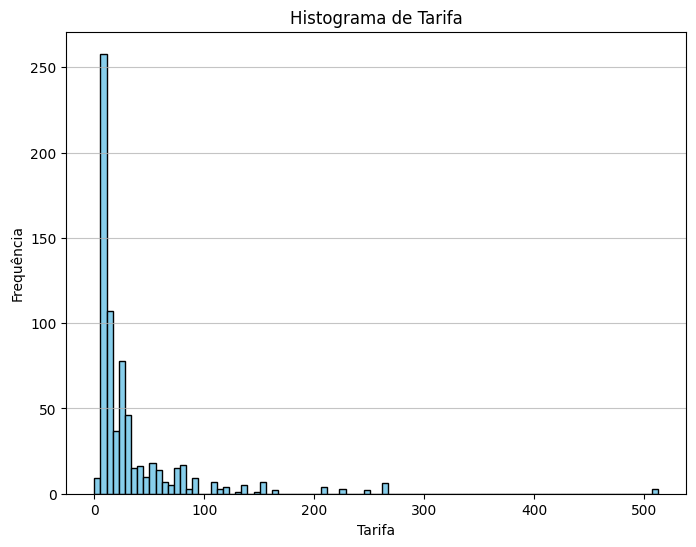

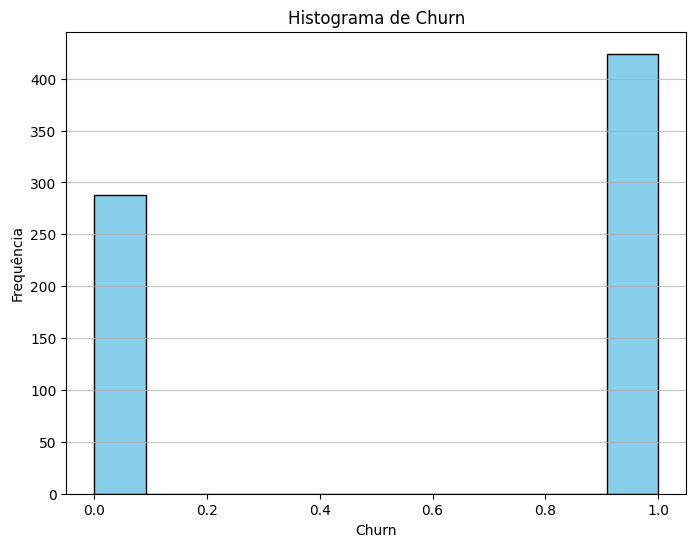

In [13]:
#apenas verificando as colunas com dados numéricos
for column in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))  # Ajuste o tamanho da figura conforme necessário
    plt.hist(df[column], bins='auto', color='skyblue', edgecolor='black') #Personalizando o histograma
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75) # Adicionando uma grade para facilitar a visualização
    plt.show()

## Análise Exploratória

Antes de aplicar modelos, vamos entender como os dados estão distribuídos em relação ao churn.


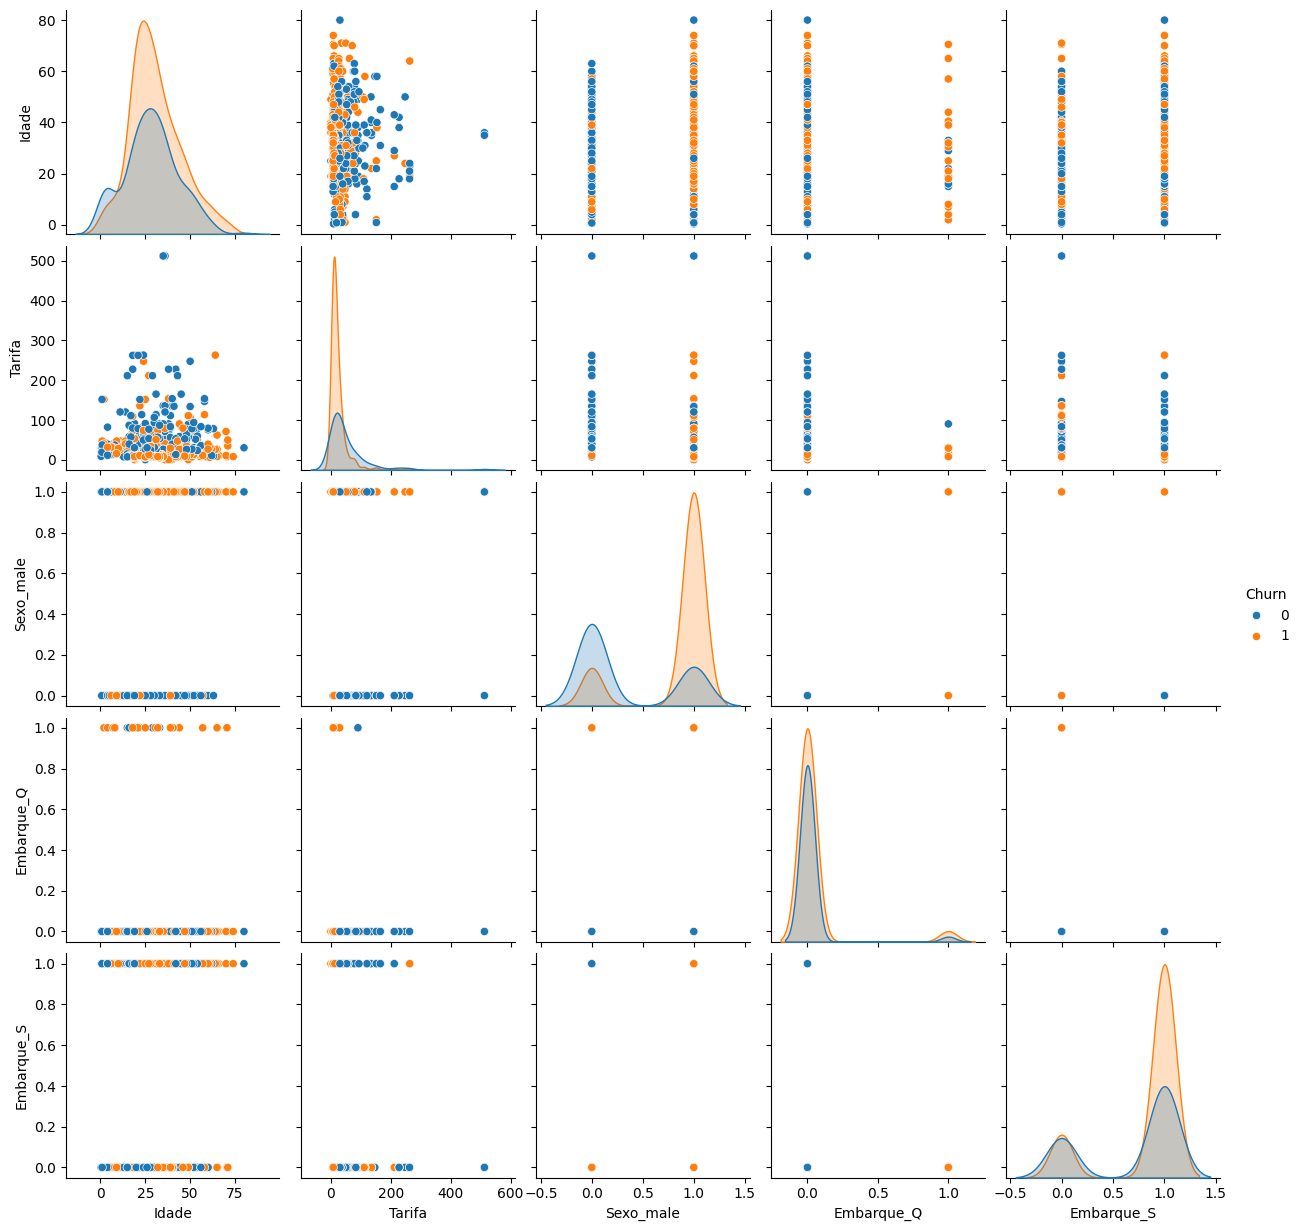

In [14]:
sns.pairplot(df, hue='Churn')
plt.show()


In [15]:
#preparando para treinamento do modelo
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Regressão Logística

A regressão logística estima a probabilidade de ocorrência de um evento (churn) com base em variáveis independentes. Ideal para variáveis dependentes binárias.


In [16]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)
preds = logmodel.predict(X_test_scaled)

print("Relatório de Classificação - Regressão Logística")
print(classification_report(y_test, preds))


Relatório de Classificação - Regressão Logística
              precision    recall  f1-score   support

           0       0.73      0.66      0.69        92
           1       0.76      0.81      0.79       122

    accuracy                           0.75       214
   macro avg       0.74      0.74      0.74       214
weighted avg       0.75      0.75      0.75       214



## Análise Discriminante Linear (LDA)

LDA busca uma combinação linear de características que melhor separa duas ou mais classes. Também é útil para visualização.


In [17]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)
lda_preds = lda_model.predict(X_test_scaled)

print("Relatório de Classificação - LDA")
print(classification_report(y_test, lda_preds))


Relatório de Classificação - LDA
              precision    recall  f1-score   support

           0       0.74      0.65      0.69        92
           1       0.76      0.83      0.79       122

    accuracy                           0.75       214
   macro avg       0.75      0.74      0.74       214
weighted avg       0.75      0.75      0.75       214



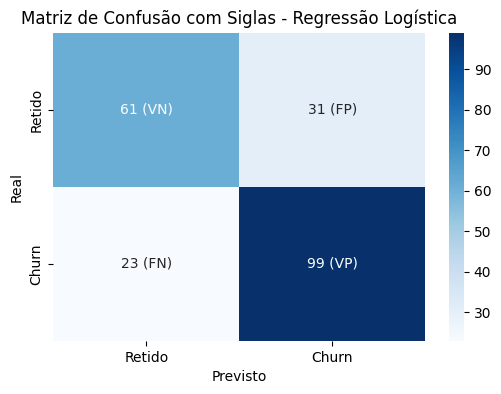

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Previsões do modelo
y_pred = logmodel.predict(X_test_scaled)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Rótulos com as siglas nos quadrantes
labels = np.array([
    [f'{cm[0,0]} (VN)', f'{cm[0,1]} (FP)'],
    [f'{cm[1,0]} (FN)', f'{cm[1,1]} (VP)']
])

# Plot com anotações
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=['Retido', 'Churn'], yticklabels=['Retido', 'Churn'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão com Siglas - Regressão Logística')
plt.show()

A matriz de confusão é essencial para avaliar o desempenho de um modelo de classificação, pois mostra:

**Verdadeiros Positivos (VP)**: modelo previu churn e era churn

**Falsos Positivos (FP)**: modelo previu churn, mas não era

**Falsos Negativos (FN)**: modelo previu que não era churn, mas era

**Verdadeiros Negativos (VN)**: modelo previu corretamente que não era churn

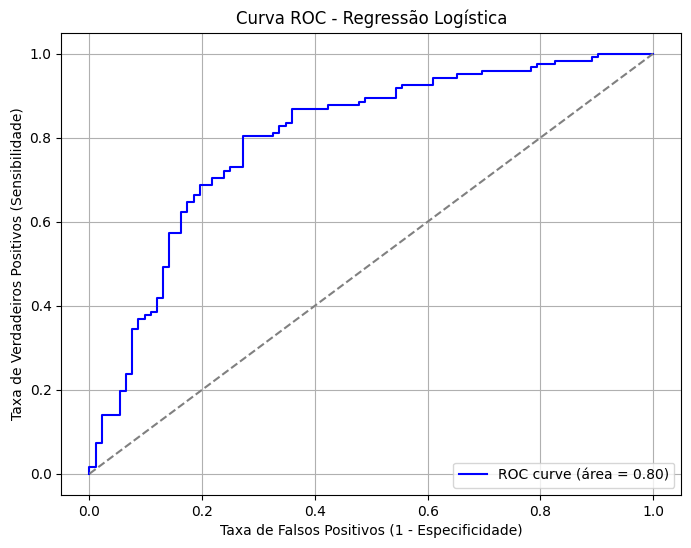

In [19]:
from sklearn.metrics import roc_curve, auc

# Gerar probabilidades preditas pelo modelo de regressão logística
y_probs = logmodel.predict_proba(X_test_scaled)[:, 1]

# Calcular os pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (área = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taxa de Falsos Positivos (1 - Especificidade)")
plt.ylabel("Taxa de Verdadeiros Positivos (Sensibilidade)")
plt.title("Curva ROC - Regressão Logística")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Comparação entre Modelos - Curva ROC

A curva ROC nos permite comparar diretamente a performance de dois modelos classificadores.
Quanto mais próximo do canto superior esquerdo, melhor o desempenho do modelo.


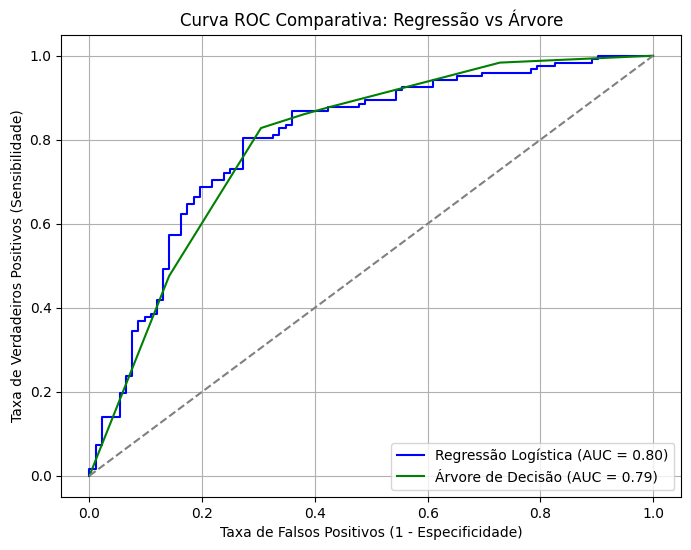

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Treinar segundo modelo: árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Probabilidades dos dois modelos
log_probs = logmodel.predict_proba(X_test_scaled)[:, 1]
tree_probs = tree_model.predict_proba(X_test)[:, 1]

# Curvas ROC
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_probs)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot comparativo
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Regressão Logística (AUC = {roc_auc_log:.2f})', color='blue')
plt.plot(fpr_tree, tpr_tree, label=f'Árvore de Decisão (AUC = {roc_auc_tree:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taxa de Falsos Positivos (1 - Especificidade)")
plt.ylabel("Taxa de Verdadeiros Positivos (Sensibilidade)")
plt.title("Curva ROC Comparativa: Regressão vs Árvore")
plt.legend(loc="lower right")
plt.grid()
plt.show()


A curva ROC (Receiver Operating Characteristic) é uma ferramenta gráfica usada para avaliar o desempenho de modelos de classificação em diferentes limiares. Ela representa a relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (1 - especificidade) para diferentes pontos de corte. Em termos simples, a curva ROC ajuda a entender como um modelo de classificação se comporta em termos de acerto e erro em diferentes situações, permitindo escolher o melhor ponto de decisão para o seu problema.

**Eixo X:**
Representa a taxa de falsos positivos (FPR), ou seja, a proporção de instâncias negativas classificadas incorretamente como positivas.

**Eixo Y:**
Representa a taxa de verdadeiros positivos (TPR), também conhecida como sensibilidade ou recall, que é a proporção de instâncias positivas corretamente classificadas.

**Curva:**
Cada ponto na curva ROC corresponde a um limiar de classificação diferente. Ao variar o limiar, você pode ver como a taxa de verdadeiros positivos e a taxa de falsos positivos se alteram.

**Interpretação da Curva ROC:**

* **Melhor Desempenho:**
Uma curva ROC que se aproxima do canto superior esquerdo do gráfico (onde a taxa de falsos positivos é baixa e a taxa de verdadeiros positivos é alta) indica um melhor desempenho do modelo.

* **Desempenho Aleatório:**
Uma linha diagonal no gráfico representa um modelo que está classificando aleatoriamente (sem distinção entre classes), conforme dados de pesquisa.

* **Área Sob a Curva (AUC):**
A área sob a curva ROC (AUC) é uma métrica única que resume o desempenho geral do modelo. Um AUC de 1 indica um modelo perfeito, enquanto um AUC de 0.5 indica um modelo aleatório.

**Aplicações:**

* **Avaliação de Modelos de Classificação:**
A curva ROC é amplamente utilizada para avaliar a eficácia de modelos de classificação em diversas áreas, como medicina (diagnóstico), detecção de fraudes, análise de risco, entre outras.

* **Comparação de Modelos:**
Permite comparar o desempenho de diferentes modelos de classificação, identificando qual deles oferece o melhor equilíbrio entre taxa de verdadeiros positivos e taxa de falsos positivos.

* **Escolha do Limiar Ótimo:**
A curva ROC ajuda a determinar o ponto de corte ideal para o seu modelo, dependendo da importância relativa de verdadeiros positivos e falsos positivos em seu contexto específico.

**Em resumo:**
A curva ROC é uma ferramenta valiosa para visualizar e avaliar o desempenho de modelos de classificação, permitindo a escolha do melhor limiar e a comparação entre diferentes modelos






#recall:
É a taxa de verdadeiros positivos. Também chamada de ***sensibilidade***.

O recall melhora quando os falsos negativos diminuem.

São os casos (instâncias de classe **positiva**) que realmente foram previstos corretamente. É a proporção entre os verdadeiros positivos previstos e o total de exemplos positivos.

#especificidade:
É a taxa de verdadeiros negativos. Portanto taxa de falsos positivos é igual a (1 - especificidade)

São os casos (instâncias da classe **negativa**) que foram previstos corretamente.

#f1-score:
É uma função, uma combinação doaprecisão e recall

O F1-Score nos mostra como está o equilíbrio entre a detecção de casos reais e os casos incorrectos (precisão)

O F1-Score deve ser utilizado em situações onde a identificação correta de uma classe positiva é mais crítica do que a identificação de uma classe negativa.

Exemplos incluem diagnósticos médicos, onde a falha em identificar uma doença pode ter consequências graves.

No nosso caso o churn seria a classe positiva que é a classe que buscamos, a qual é mais crítica de se identificar do que a classe negativa (não houve churn)

#precision:
A precisão melhora à medida que os falsos positivos diminuem, enquanto o recall melhora quando os falsos negativos diminuem

A precisão indica a proporção de previsões positivas corretas em relação ao total de previsões positivas

#support
Representa o número de exemplos em cada classe.

Essa métrica é importante para entender se o conjunto de dados é balanceado (classes com número de exemplos próximos) ou desbalanceado (classes com número de exemplos bem diferentes), o que pode afetar a interpretação das outras métricas

Vamos comparar os modelos **regressão logística** e **árvore de decisão** com base em dois critérios fundamentais:

---

## 🔍 1. **Qual modelo escolher?**

### ✅ **Critério principal: AUC (Área sob a curva ROC)**

* Se no gráfico ROC **a curva da regressão logística** estiver **acima** da da árvore de decisão e tiver um AUC maior, **ela é o modelo preferido**.
* **AUC mais alto → melhor capacidade de distinguir churn vs. não churn.**

### ✅ **Critério secundário: interpretabilidade e simplicidade**

| Critério                | Regressão Logística   | Árvore de Decisão                      |
| ----------------------- | --------------------- | -------------------------------------- |
| AUC (geralmente)        | Mais alto             | Menor, mas decente com tuning          |
| Interpretabilidade      | Alta (coeficientes)   | Alta (visualização da árvore)          |
| Tendência a overfitting | Baixa (regularizável) | Alta (especialmente árvores profundas) |
| Velocidade de execução  | Muito rápida          | Rápida                                 |

### 🎯 **Conclusão:**

> **Escolher a regressão logística** caso seu AUC seja maior e você deseje um modelo estável, simples e fácil de justificar ao negócio.

---

## 🔧 2. **Qual modelo é mais estável?**

### Estabilidade significa: **menor variação de desempenho em novos dados.**

| Aspecto                      | Regressão Logística | Árvore de Decisão        |
| ---------------------------- | ------------------- | ------------------------ |
| Sensível a ruído             | Pouco               | Muito                    |
| Varia com mudanças pequenas  | Pouco               | Muito (instável)         |
| Generalização em novos dados | Melhor              | Pior (sem poda adequada) |

### 🎯 **Conclusão sobre estabilidade:**

> ✅ **Regressão logística é mais estável** que a árvore de decisão, especialmente em datasets pequenos ou com ruído.

---

## ✅ Recomendação final:

Use **regressão logística** como modelo padrão inicial para:

* Ter **melhor estabilidade**
* Ter **maior confiabilidade estatística**
* Evitar **overfitting**
* Explicar facilmente ao time de marketing ou negócios

⚠️ Use a **árvore de decisão** como modelo exploratório ou interpretativo, ou se você fizer tuning (ex: poda, ensemble como Random Forest).



##XGBoost

é totalmente possível (e recomendado) usar o XGBoost na comparação gráfica com as curvas ROC — e inclusive ele é frequentemente o modelo mais robusto e preciso em problemas de churn.

✅ Por que usar o XGBoost na comparação?


| Vantagem                     | Explicação rápida                                 |
| ---------------------------- | ------------------------------------------------- |
| ✅ Alta performance           | Ganha de modelos simples como árvore ou regressão |
| ✅ Lida bem com colinearidade* | Internamente faz regularização*                    |
| ✅ Resistente a overfitting*   | Com bons hiperparâmetros                          |
| ✅ Feature importance robusta | Ajuda a entender drivers do churn                 |

* **Colinearidade** é a propriedade que indica que num conjunto de três ou mais pontos, eles estão posicionados de tal forma que se pode traçar uma reta que contenha todos eles

* **regularização** Regularização é um conjunto de métodos usados para induzir simplicidade nos modelos de machine learning, adicionando uma penalidade às suas complexidades. O objetivo é prevenir o overfitting

* **overfitting** quando o modelo se ajusta demais aos dados de treinamento e perde a capacidade de generalizar para novos dados

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:29:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


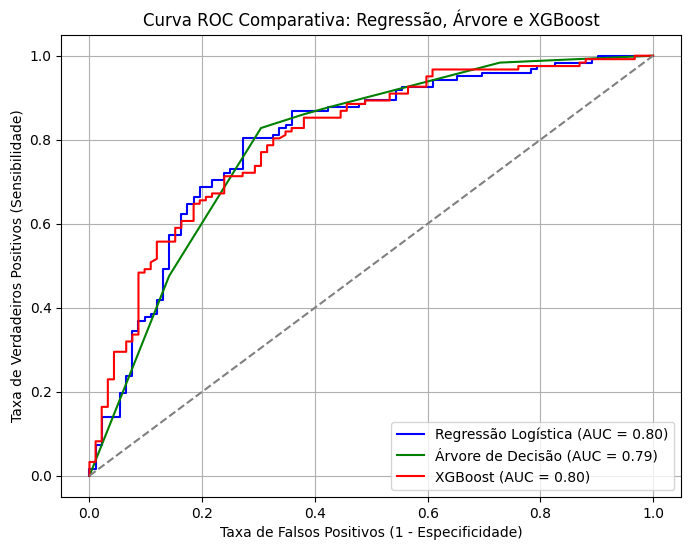

In [23]:
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

# Treinar modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Gerar probabilidades para a curva ROC
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot comparativo com os outros modelos
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Regressão Logística (AUC = {roc_auc_log:.2f})', color='blue')
plt.plot(fpr_tree, tpr_tree, label=f'Árvore de Decisão (AUC = {roc_auc_tree:.2f})', color='green')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taxa de Falsos Positivos (1 - Especificidade)")
plt.ylabel("Taxa de Verdadeiros Positivos (Sensibilidade)")
plt.title("Curva ROC Comparativa: Regressão, Árvore e XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Árvore de Decisão

Modelo interpretável que divide os dados com base nas variáveis explicativas. Útil para identificar segmentos específicos propensos a churn.


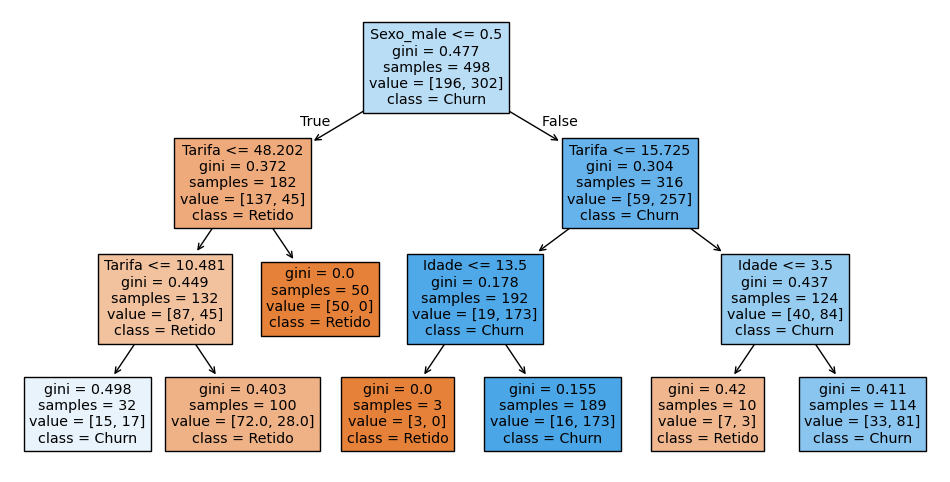

In [18]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X.columns, class_names=['Retido', 'Churn'], filled=True)
plt.show()


## Conclusão e Recomendações de Marketing

- A taxa de churn média identificada foi de aproximadamente 62.00%.
- Variáveis como 'Sexo_male' e 'Tarifa' estão fortemente associadas ao churn.
- O modelo de árvore de decisão mostra que clientes com tarifas mais baixas e homens têm maior probabilidade de churn.

### Recomendações:
1. Desenvolver campanhas específicas para homens com baixo valor de tarifa.
2. Oferecer benefícios e retenção personalizada a esse segmento.
3. Monitorar continuamente os perfis identificados com alta propensão ao churn.

Essas ações devem ser conduzidas em colaboração com o time de marketing e CRM.
